In [437]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from yellowbrick.regressor import ResidualPlot

In [403]:
paris_housing = pd.read_csv('ParisHousing.csv')
paris_housing

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1726,89,0,1,5,73133,7,6,2009,0,1,9311,1698,218,0,4,176425.9
9996,44403,29,1,1,12,34606,9,4,1990,0,1,9061,1742,230,0,0,4448474.0
9997,83841,3,0,0,69,80933,10,10,2005,1,1,8304,7730,345,1,9,8390030.5
9998,59036,70,0,0,96,55856,1,3,2010,0,1,2590,6174,339,1,4,5905107.0


In [ ]:
# sns.barplot(x="squareMeters", y="price", data=paris_housing)

In [407]:
# SqNuOfRms = sns.barplot(x="price", y="numberOfRooms", data=paris_housing)

In [408]:
# sns.set(rc = {'figure.figsize':(15,8)})
# SqNuOfRms = sns.lineplot(x="price", y="numberOfRooms", data=paris_housing)

In [409]:
# sns.set(rc = {'figure.figsize':(15,8)})
# SqNuOfRms = sns.barplot(x="squareMeters", y="floors", data=paris_housing)

In [410]:
paris_housing.shape

(10000, 17)

In [411]:
paris_housing.isna().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
dtype: int64

In [412]:
paris_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [413]:
paris_housing.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04
mean,49870.13120,50.358400,0.508700,0.496800,50.276300,50225.486100,5.510100,5.521700,2005.48850,0.499100,0.499900,5033.103900,5028.01060,553.12120,0.503000,4.99460,4.993448e+06
std,28774.37535,28.816696,0.499949,0.500015,28.889171,29006.675799,2.872024,2.856667,9.30809,0.500024,0.500025,2876.729545,2894.33221,262.05017,0.500016,3.17641,2.877424e+06
min,89.00000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,0.000000,0.000000,1.00000,100.00000,0.000000,0.00000,1.031350e+04
25%,25098.50000,25.000000,0.000000,0.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,0.000000,0.000000,2559.750000,2512.00000,327.75000,0.000000,2.00000,2.516402e+06
50%,50105.50000,50.000000,1.000000,0.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,0.000000,0.000000,5092.500000,5045.00000,554.00000,1.000000,5.00000,5.016180e+06
75%,74609.75000,75.000000,1.000000,1.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,1.000000,1.000000,7511.250000,7540.50000,777.25000,1.000000,8.00000,7.469092e+06
max,99999.00000,100.000000,1.000000,1.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,1.000000,1.000000,10000.000000,10000.00000,1000.00000,1.000000,10.00000,1.000677e+07


<AxesSubplot:>

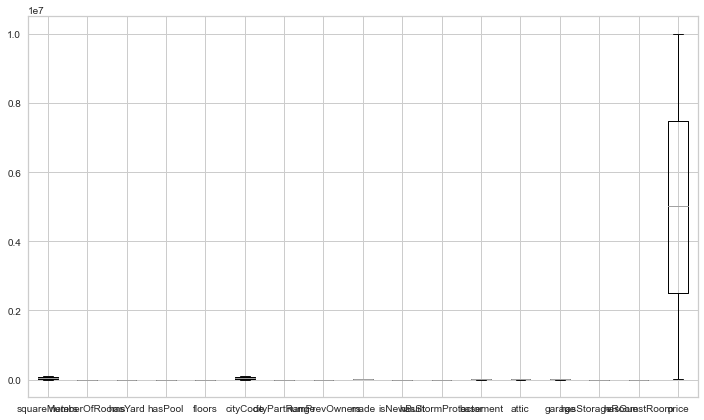

In [415]:
plt.figure(figsize = (12, 7))
paris_housing.boxplot()

<AxesSubplot:>

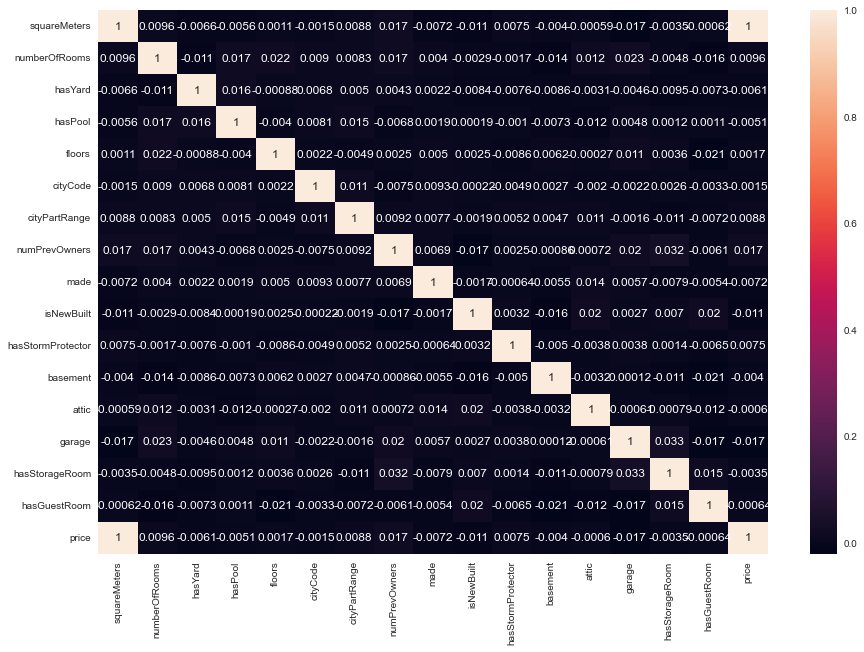

In [416]:
plt.figure(figsize=(15,10))
sns.heatmap(paris_housing.corr(), annot = True)

<AxesSubplot:>

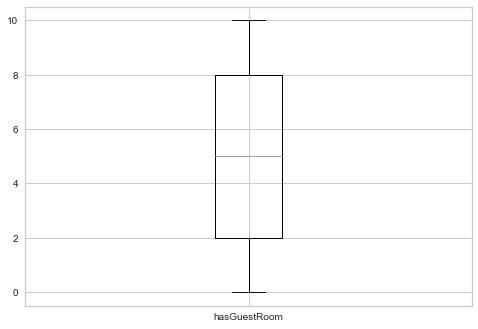

In [417]:
paris_housing.boxplot(['hasGuestRoom'])

In [418]:
y = paris_housing['price']
x = paris_housing.drop(columns=['price', 'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt', 'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom', 'hasGuestRoom'], axis=1)

In [363]:
x

,squareMeters,numberOfRooms,hasYard,hasPool,floors
0,75523,3,0,1,63
1,80771,39,1,1,98
2,55712,58,0,1,19
3,32316,47,0,0,6
4,70429,19,1,1,90
...,...,...,...,...,...
9995,1726,89,0,1,5
9996,44403,29,1,1,12
9997,83841,3,0,0,69
9998,59036,70,0,0,96


In [364]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=45)

In [419]:
Scaler = MinMaxScaler()
Normal = Scaler.fit_transform(X_train)
X_train_scale, X_test_scale, y_train_scale, y_test_scale = train_test_split(Normal, y_train, test_size=.20, random_state=45)

In [420]:
from sklearn.decomposition import PCA

In [421]:
model = PCA(n_components = 5)
model_ = model.fit(X_train_scale, y_train_scale)

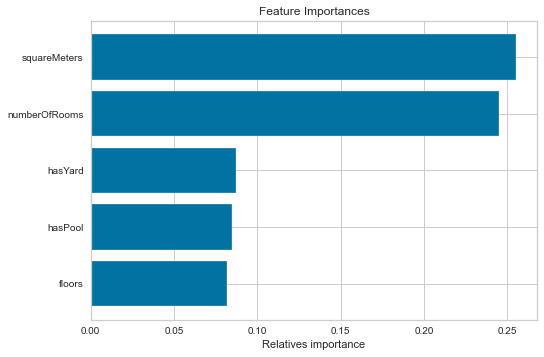

In [422]:
features = paris_housing.columns
importances = model_.explained_variance_
indices = np.argsort(importances)[-10:]
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relatives importance')
plt.show()

In [423]:
model = LinearRegression()
model = model.fit(X_train_scale, y_train_scale)

In [424]:
coef_deter = model.score(X_train_scale, y_train_scale)
coef_deter

0.9999995622840707

In [425]:
intercept = model.coef_
intercept

array([ 9.99098675e+06, -3.63870334e+01,  3.02333711e+03,  2.97016494e+03,
        5.47011436e+03])

In [426]:
y_predict = model.predict(X_test_scale)

In [427]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("MAE : ", mean_absolute_error(y_test_scale, y_predict))
print("MSE : ", mean_squared_error(y_test_scale, y_predict))
print("R2 score : ", r2_score(y_test_scale, y_predict))

MAE :  1489.9401153209817
MSE :  3675803.6212656163
R2 score :  0.9999995649466572


In [428]:
model = Ridge()
model = model.fit(X_train_scale, y_train_scale)

In [429]:
coef_deter = model.score(X_train_scale, y_train_scale)
coef_deter

0.9999960481847447

In [430]:
intercept = model.coef_
intercept

array([9.97225261e+06, 3.63466275e+02, 2.94262930e+03, 2.90352691e+03,
       5.42469802e+03])

In [431]:
y_predict = model.predict(X_test_scale)

In [432]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("MAE : ", mean_absolute_error(y_test_scale, y_predict))
print("MSE : ", mean_squared_error(y_test_scale, y_predict))
print("R2 score : ", r2_score(y_test_scale, y_predict))

MAE :  5003.8869579251095
MSE :  34073381.20492225
R2 score :  0.9999959672115484


In [438]:
from yellowbrick.regressor import ResidualPlot
model = LinearRegression()
visualizer = ResidualPlot(model, hist=True, qqplot=False)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()